# Proje Özeti
Enerjinin tüketiminin planlanması gelecekte daha temiz bir dünya için kaçınılmaz bir süreç haline gelmiştir. 
Bu projenin öncelikli hedefi de Kaggle'da bulunan İspanya'nın 2015-2019 yılları arasındaki 4 yıllık
enerji talepleri datasını kullanarak, gelecekteki talebi tahmin etmek ve onu İspanya'daki Transmission Service Operator(TSO) kurumunun yaptığı tahminlerle karşılaştırmaktır.

# Data Wrangling and EDA

In [1]:
pip install tensorflow scikeras scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from scikeras.wrappers import KerasRegressor
pd.set_option("display.max_colwidth", 40)


In [2]:
df = pd.read_csv('energy_dataset.csv')

df.head(-1)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35058,2018-12-31 18:00:00+01:00,293.0,0.0,0.0,7593.0,2604.0,178.0,0.0,0.0,0.0,...,289.0,0.0,2952.0,300.0,NaN,3028.0,29690.0,29592.0,68.58,77.61
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30


In [3]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
corr = df.corr()
print(corr['total load actual'].sort_values(ascending=False).to_string())

total load actual                              1.000000
total load forecast                            0.995139
generation fossil gas                          0.548913
generation fossil oil                          0.497089
generation hydro water reservoir               0.479481
price day ahead                                0.473869
price actual                                   0.436127
forecast solar day ahead                       0.404362
generation fossil hard coal                    0.396564
generation solar                               0.396189
generation fossil brown coal/lignite           0.280461
generation other renewable                     0.181714
generation hydro run-of-river and poundage     0.118570
generation other                               0.100690
generation nuclear                             0.085664
generation biomass                             0.083288
generation waste                               0.077312
generation wind onshore                        0

<AxesSubplot:>

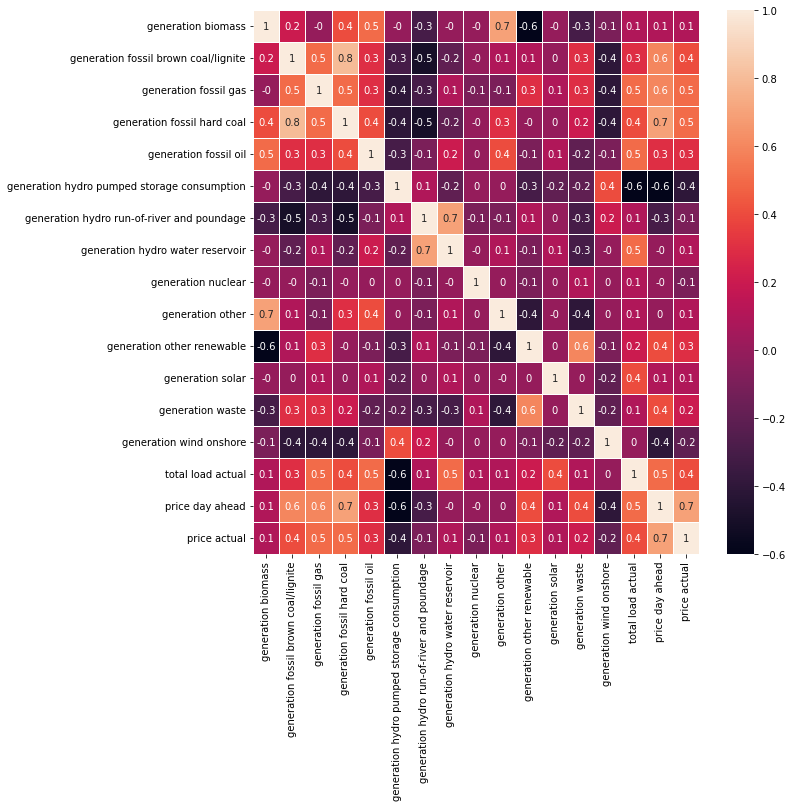

In [6]:
#extract the nan columns with 0 correlation to total load actual
nan_colms= ['generation fossil coal-derived gas',
           'generation fossil oil shale',
           'generation fossil peat',
           'generation geothermal',
           'generation hydro pumped storage aggregated',
           'generation marine',
           'generation wind offshore',
           'forecast wind offshore eday ahead',
           'forecast wind onshore day ahead',
           'forecast solar day ahead',
           'total load forecast']

new_df = df.drop(columns = nan_colms, axis = 1)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(round(new_df.corr(),1),annot=True,linewidth=0.9,ax=ax )

In [7]:
#Nan değerleri kontrol edelim
new_df.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [8]:
#Kaç tane 0 değer olduğunu hesaplayalım
new_df.eq(0).sum()

time                                               0
generation biomass                                 4
generation fossil brown coal/lignite           10517
generation fossil gas                              1
generation fossil hard coal                        3
generation fossil oil                              3
generation hydro pumped storage consumption    12607
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation nuclear                                 3
generation other                                   4
generation other renewable                         3
generation solar                                   3
generation waste                                   3
generation wind onshore                            3
total load actual                                  0
price day ahead                                    0
price actual                                       0
dtype: int64

In [9]:

new_df.shape

(35064, 18)

In [10]:
# NAN değerleri linear bir şekilde doldurduk, yani NaN, öncesindeki ve sonrasındaki değerlerin toplamının yarısı 
# olarak değiştirildi. Model accuracy'si denenirken, farklı doldurma yöntemleri de denenebilir.
new_df = new_df.interpolate(method ='linear', limit_direction ='forward')

new_df.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

In [11]:
copy_df = new_df
new_df.eq(0).sum()

time                                               0
generation biomass                                 4
generation fossil brown coal/lignite           10524
generation fossil gas                              1
generation fossil hard coal                        3
generation fossil oil                              3
generation hydro pumped storage consumption    12614
generation hydro run-of-river and poundage         3
generation hydro water reservoir                   3
generation nuclear                                 3
generation other                                   4
generation other renewable                         3
generation solar                                   3
generation waste                                   3
generation wind onshore                            3
total load actual                                  0
price day ahead                                    0
price actual                                       0
dtype: int64

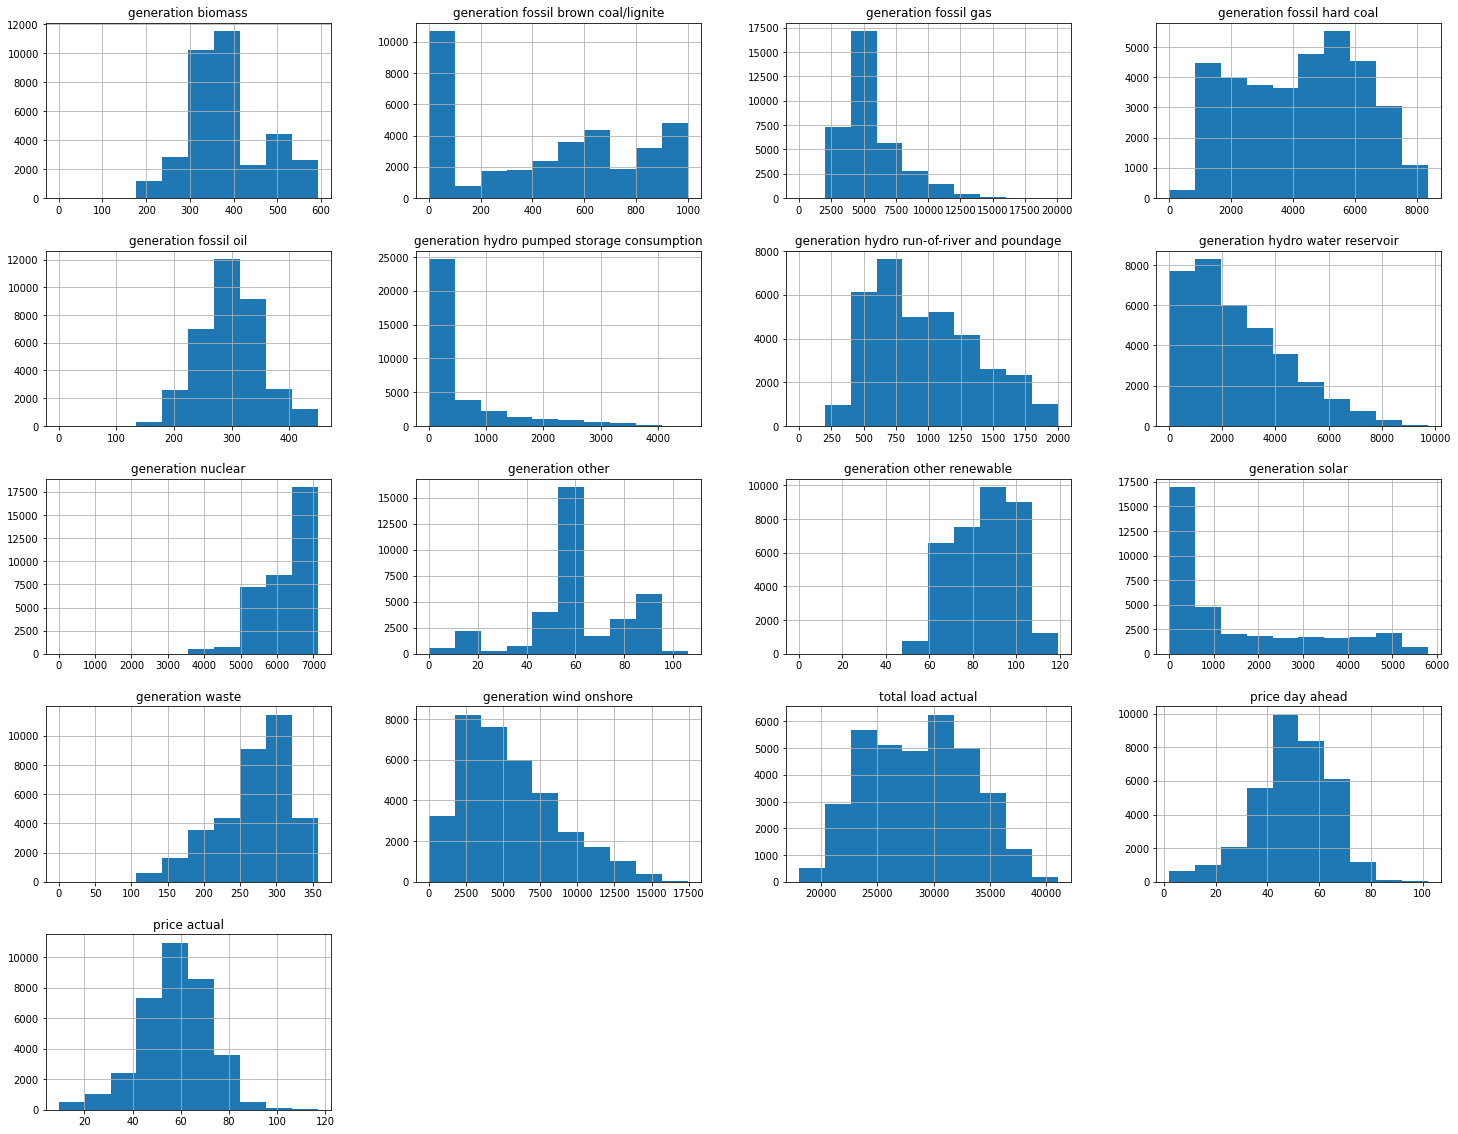

In [12]:
# Histogram
new_df.hist(figsize = (25,20))
plt.show()
#Farklı enerji kaynaklarının ortalama enerji üretimlerini veya ne sıklıkla ne kadar enerji ürettiklerini anlamak için.
# x-axis: tekrarlanma miktarı y-axis: üretilen enerji (MWh)

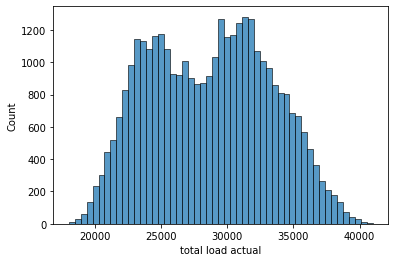

In [13]:
sns.histplot(df,x='total load actual');

In [14]:
#df["time"]
#datetime_series = pd.to_datetime(new_df["time"], utc = True)
#datetime_series.dt.hour
#new_df['hour'] = datetime_series.dt.hour
#new_df['hour']

new_df.columns = new_df.columns.str.replace(' ','_').str.replace('-','_')
copy_df.columns = copy_df.columns.str.replace(' ','_').str.replace('-','_')

In [15]:
#Tarih sütünunu gelecekteki kullanımlar için saat, gün, hafta, ay gibi dilimlere böldüm:
# Haftalık koy!
df_datesiz = new_df.select_dtypes(include = ["float64", "int64"])
datetime_series = pd.to_datetime(new_df['time'],utc=True)
new_df['date'] = datetime_series.dt.date
new_df['year'] = datetime_series.dt.year
new_df['hour'] = datetime_series.dt.hour
new_df['day'] = datetime_series.apply(lambda x: x.day_name())
new_df['month'] = datetime_series.apply(lambda x: x.month_name())

date = new_df[["date","year","month","day","hour"]]

date


,date,year,month,day,hour
0,2014-12-31,2014,December,Wednesday,23
1,2015-01-01,2015,January,Thursday,0
2,2015-01-01,2015,January,Thursday,1
3,2015-01-01,2015,January,Thursday,2
4,2015-01-01,2015,January,Thursday,3
...,...,...,...,...,...
35059,2018-12-31,2018,December,Monday,18
35060,2018-12-31,2018,December,Monday,19
35061,2018-12-31,2018,December,Monday,20
35062,2018-12-31,2018,December,Monday,21


In [16]:
copy_df['time'] = pd.to_datetime(copy_df['time'],utc=True)
copy_df = copy_df.iloc[1:]
copy_df

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,...,generation_waste,generation_wind_onshore,total_load_actual,price_day_ahead,price_actual,date,year,hour,day,month
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,195.0,5890.0,24382.0,48.10,64.92,2015-01-01,2015,0,Thursday,January
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,196.0,5461.0,22734.0,47.33,64.48,2015-01-01,2015,1,Thursday,January
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,191.0,5238.0,21286.0,42.27,59.32,2015-01-01,2015,2,Thursday,January
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,189.0,4935.0,20264.0,38.41,56.04,2015-01-01,2015,3,Thursday,January
5,2015-01-01 04:00:00+00:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,...,188.0,4618.0,19905.0,35.72,53.63,2015-01-01,2015,4,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,...,277.0,3113.0,30653.0,68.85,77.02,2018-12-31,2018,18,Monday,December
35060,2018-12-31 19:00:00+00:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,...,280.0,3288.0,29735.0,68.40,76.16,2018-12-31,2018,19,Monday,December
35061,2018-12-31 20:00:00+00:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,...,286.0,3503.0,28071.0,66.88,74.30,2018-12-31,2018,20,Monday,December
35062,2018-12-31 21:00:00+00:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,...,287.0,3586.0,25801.0,63.93,69.89,2018-12-31,2018,21,Monday,December


In [17]:
son_df = pd.concat([date, df_datesiz], axis=1).copy()
son_df = son_df.iloc[1:]
son_df

,date,year,month,day,hour,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,...,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_day_ahead,price_actual
1,2015-01-01,2015,January,Thursday,0,449.0,328.0,5196.0,4755.0,158.0,...,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2,2015-01-01,2015,January,Thursday,1,448.0,323.0,4857.0,4581.0,157.0,...,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
3,2015-01-01,2015,January,Thursday,2,438.0,254.0,4314.0,4131.0,160.0,...,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
4,2015-01-01,2015,January,Thursday,3,428.0,187.0,4130.0,3840.0,156.0,...,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04
5,2015-01-01,2015,January,Thursday,4,410.0,178.0,4038.0,3590.0,156.0,...,743.0,7098.0,43.0,74.0,34.0,188.0,4618.0,19905.0,35.72,53.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31,2018,December,Monday,18,297.0,0.0,7634.0,2628.0,178.0,...,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,68.85,77.02
35060,2018-12-31,2018,December,Monday,19,296.0,0.0,7241.0,2566.0,174.0,...,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,68.40,76.16
35061,2018-12-31,2018,December,Monday,20,292.0,0.0,7025.0,2422.0,168.0,...,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,66.88,74.30
35062,2018-12-31,2018,December,Monday,21,293.0,0.0,6562.0,2293.0,163.0,...,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,63.93,69.89


As we can see from above table, there is one outlier data from the 2014 year which in fact must not be in the data. Hence, I removed this data from the dataset as an outlier data.


In [18]:
#Dataya son olarak sezonsallığı da ekledim. Bu sayede sezonsallığın da sonuç üzerindeki etkisini daha iyi gözlemleyebiliriz.
son_df.loc[(son_df["month"] =="December") | (son_df["month"] =="January") | (son_df["month"] =="February") , "season"]= "winter"
son_df.loc[(son_df["month"] =="March")| (son_df["month"] =="April") | (son_df["month"] =="May") , "season"]= "spring"
son_df.loc[(son_df["month"] =="June") | (son_df["month"] =="July") |(son_df["month"] =="August"), "season"]= "summer"
son_df.loc[(son_df["month"] =="September") |(son_df["month"] =="October") | (son_df["month"] =="November"), "season"]= "autumn"

son_df.head(5)




,date,year,month,day,hour,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,...,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_day_ahead,price_actual,season
1,2015-01-01,2015,January,Thursday,0,449.0,328.0,5196.0,4755.0,158.0,...,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92,winter
2,2015-01-01,2015,January,Thursday,1,448.0,323.0,4857.0,4581.0,157.0,...,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48,winter
3,2015-01-01,2015,January,Thursday,2,438.0,254.0,4314.0,4131.0,160.0,...,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32,winter
4,2015-01-01,2015,January,Thursday,3,428.0,187.0,4130.0,3840.0,156.0,...,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04,winter
5,2015-01-01,2015,January,Thursday,4,410.0,178.0,4038.0,3590.0,156.0,...,7098.0,43.0,74.0,34.0,188.0,4618.0,19905.0,35.72,53.63,winter


In [19]:
import plotly.express as px

<AxesSubplot:xlabel='year,month', ylabel='Total load actual'>

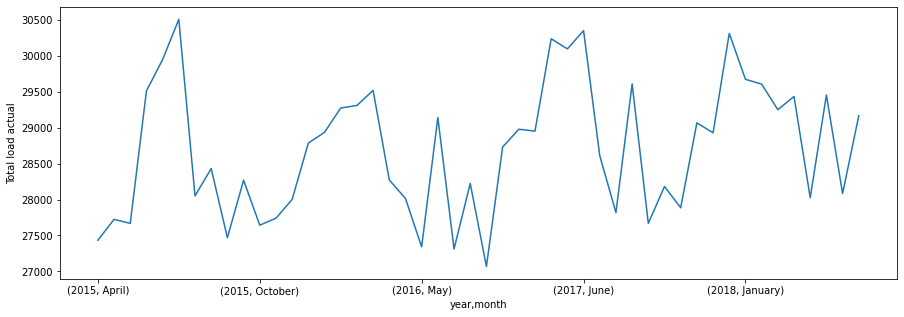

In [20]:
# Figure showing Price per total load
#fig = px.scatter(son_df,x=,
 #                y="total_load_actual",
  #               facet_col='season',
   #              opacity=0.1,
    #             title='Price Per KW Hour Compaired To Total Energy Genereated Per Season',
     #            animation_frame=son_df.year)
#fig

son_df[son_df.total_load_actual != 0].groupby([son_df.year,
                         son_df.month])["total_load_actual"].mean().plot(ylabel= 'Total load actual',figsize=(15,5))



Görüldüğü gibi Sezonsallık olsa da yıllara göre sezona göre değişkenlik gözüküyor, ama genelleme yapılacak olursa yaz ve kış aylarında elektrik tüketimi artıyor diyebiliriz.

In [21]:
son_df = son_df.drop(['price_day_ahead','price_actual'],axis = 1)

In [22]:
train, test = son_df[son_df.year < 2018], son_df[son_df.year == 2018]
print(train.shape)
print(test.shape)

(26304, 21)
(8759, 21)


In [23]:
from sktime.utils.plotting import plot_series

lgb_train = copy_df[copy_df.time.dt.year <2018].groupby(['time'])['total_load_actual'].sum()
lgb_test = copy_df[copy_df.time.dt.year ==2018].groupby(['time'])['total_load_actual'].sum()

lgb_train_m = lgb_train.groupby(pd.Grouper(freq='W')).sum()
lgb_test_m = lgb_test.groupby(pd.Grouper(freq='W')).sum()
lgb_train_m.shape, lgb_test_m.shape
lgb_train_m = lgb_train_m[1:]
lgb_test_m= lgb_test_m[:-1]

2015-01-01 00:00    24382.0
2015-01-01 01:00    22734.0
2015-01-01 02:00    21286.0
2015-01-01 03:00    20264.0
2015-01-01 04:00    19905.0
                     ...   
2017-12-31 19:00    28666.0
2017-12-31 20:00    27260.0
2017-12-31 21:00    25043.0
2017-12-31 22:00    23680.0
2017-12-31 23:00    22779.0
Freq: H, Name: total_load_actual, Length: 26304, dtype: float64

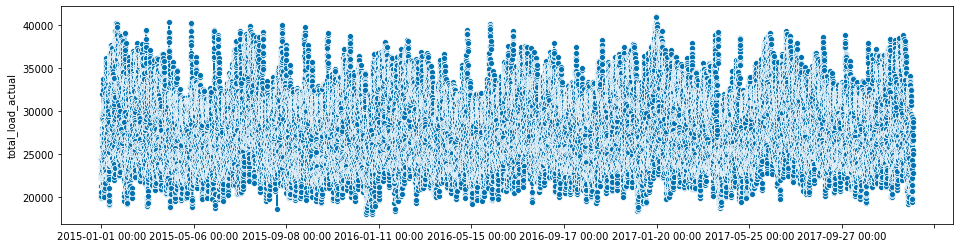

In [100]:
lgb_train= lgb_train.to_period('H')
lgb_test= lgb_test.to_period('H')
plot_series(lgb_train)
lgb_train

# LGBM

In [112]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.naive import NaiveForecaster
# make forecast for monthly data
fh = ForecastingHorizon(lgb_test_m.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(lgb_train_m)

NaiveForecaster(sp=12)

-1.0827081259279612
292807.875


C:\Users\MONSTER\anaconda3\envs\proje\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\MONSTER\anaconda3\envs\proje\lib\site-packages\sktime\forecasting\base\_fh.py:758: UserWarning: Converting to Period representation will drop timezone information.
  return x.to_period(freq)


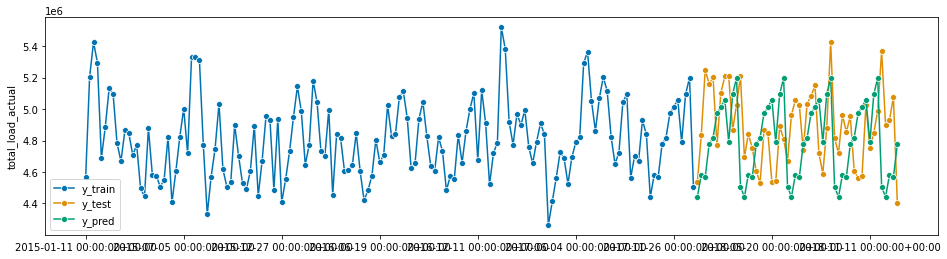

In [113]:
y_pred = forecaster.predict(fh)
plot_series(lgb_train_m, lgb_test_m, y_pred, labels=["y_train", "y_test", "y_pred"])
print(r2_score(lgb_test_m, y_pred))
print(mean_absolute_error(lgb_test_m, y_pred))

-1.845967466007275
6502.159550176961


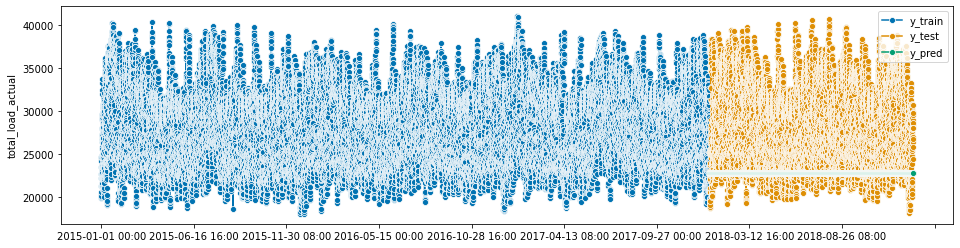

In [89]:
#MAKE FORECAST FOR HOURLY DATA
fh = ForecastingHorizon(lgb_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(lgb_train)
y_pred = forecaster.predict(fh)
plot_series(lgb_train, lgb_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(r2_score(lgb_test, y_pred))
print(mean_absolute_error(lgb_test, y_pred))

C:\Users\MONSTER\anaconda3\envs\proje\lib\site-packages\sktime\forecasting\base\_fh.py:758: UserWarning: Converting to Period representation will drop timezone information.
  return x.to_period(freq)


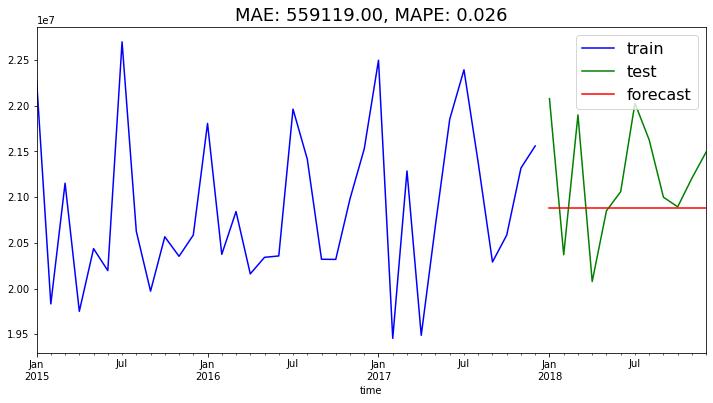

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
def plot_forecast(series_train, series_test, forecast):

    mae = mean_absolute_error(series_test, forecast)
    mape = mean_absolute_percentage_error(series_test, forecast)

    plt.figure(figsize=(12, 6))
    plt.title(f"MAE: {mae:.2f}, MAPE: {mape:.3f}", size=18)
    series_train.plot(label="train", color="b")
    series_test.plot(label="test", color="g")
    forecast.index = series_test.index
    forecast.plot(label="forecast", color="r")
    plt.legend(prop={"size": 16})
    plt.show()

    return mae, mape
fh = np.arange(int(len(lgb_test_m))) + 1
forecast = forecaster.predict(fh=fh)
arima_mae, arima_mape = plot_forecast(
    lgb_train_m, lgb_test_m, forecast
)

C:\Users\MONSTER\anaconda3\envs\proje\lib\site-packages\sktime\forecasting\base\_fh.py:758: UserWarning: Converting to Period representation will drop timezone information.
  return x.to_period(freq)
C:\Users\MONSTER\anaconda3\envs\proje\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\MONSTER\anaconda3\envs\proje\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\MONSTER\anaconda3\envs\proje\lib\site-packages\sktime\forecasting\base\_fh.py:758: UserWarning: Converting to Period representation will drop timezone information.
  return x.to_period(freq)
C:\Users\MONSTER\anaconda3\envs\proje\lib\site-packages\sktime\forecasting\base\_fh.py:758: UserWarning: Converting to Period representation will drop timezone information.
  return x.to_period(

0.14664114123831426

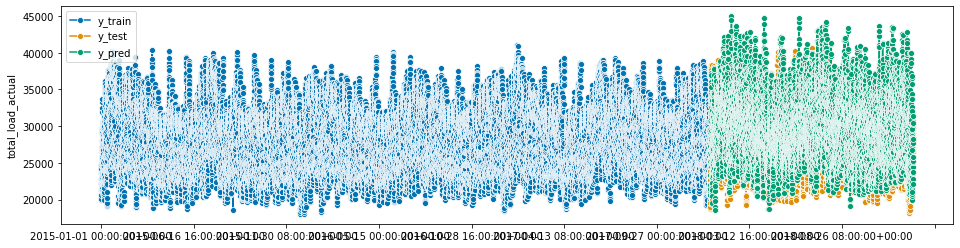

In [34]:
from sktime.forecasting.compose import make_reduction, TransformedTargetForecaster
from sktime.forecasting.model_selection import ExpandingWindowSplitter, ForecastingGridSearchCV
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.base import ForecastingHorizon
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
import lightgbm as lgb

def create_forecaster():

    # creating forecaster with LightGBM
    regressor = lgb.LGBMRegressor()
    forecaster = TransformedTargetForecaster(steps=[
            ("deseasonaliser", Deseasonalizer(model="additive", sp=8759)), #Bir yıl periyot
            ("detrender", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
            (
                # Recursive strategy for Multi-Step Ahead Forecast.
                # Auto Regress on two previous values
                "forecaster",
                make_reduction(
                    estimator=regressor, window_length=168, strategy="recursive",
                ),
            ),
        ]
    )
    return forecaster
forecaster = create_forecaster()
forecaster.fit(lgb_train)
fh = ForecastingHorizon(lgb_test.index, is_relative=False)

y_pred = forecaster.predict(fh)
plot_series(lgb_train, lgb_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(lgb_test, y_pred, symmetric=False)


# XGBoost Trial

In [ ]:
from pycaret.regression import *

s = setup(data = train, test_data = test, target = 'total_load_actual',
          fold_strategy = 'timeseries', 
          categorical_features = ['year', 'month', 'day','hour','season'],
          fold = 20, transform_target = True, session_id = 123)

In [ ]:
best = compare_models(sort = 'R2')

In [ ]:
print(best)

In [ ]:
plot_model(best, plot = 'residuals')

In [ ]:
#we create a model using light gbm
lightgbm = create_model('lightgbm')

In [ ]:
tuned_lightgbm = tune_model(lightgbm) 

In [ ]:

plot_model(lightgbm)

In [ ]:
plot_model(lightgbm, plot = 'error')

In [ ]:
plot_model(tuned_lightgbm, plot='feature') 

In [ ]:
predict_model(tuned_lightgbm);

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [ ]:
#Final Light Gradient Boosting Machine parameters for deployment
print(final_lightgbm)

In [ ]:
predict_model(final_lightgbm);

In [ ]:
#removing any negative values
unseen_predictions = predict_model(final_lightgbm, data=test)
unseen_predictions.head()
unseen_predictions.loc[unseen_predictions['Label'] < 0, 'Label'] = 0 

In [ ]:
unseen_predictions.head(20)

In [ ]:
#As it can be seen, there is no negative values

In [ ]:
def plot_series(time, series,i, format="-", start=0, end=None):
    #plt.figure(figsize=(20,10))
    plt.plot(time[start:end], series[start:end], format,label=i)
    plt.xlabel("date")
    plt.ylabel("Total_load_actual")
    plt.legend()

In [ ]:
plt.figure(figsize=(20,10))
plot_series(test.date, test['total_load_actual'],"True")
#plot_series(train['ds'],train['y'])
plot_series(test.date, unseen_predictions['Label'],"Baseline")

In [ ]:
def calc_smape(y_hat, y):
        return 100/len(y) * np.sum(2 * np.abs(y_hat - y) / (np.abs(y) + np.abs(y_hat)))
calc_smape(test['total_load_actual'].values,unseen_predictions['Label'].values)

In [ ]:
#huber = create_model('huber', verbose = False)
rf = create_model('rf', verbose = False)

#xgboost = create_model('xgboost')


In [ ]:
tuned_rf = tune_model(rf)

In [ ]:
plot_model(tuned_rf)

In [ ]:
xgboost = create_model('xgboost')


In [ ]:
tuned_xg = tune_model(xgboost)

In [ ]:
xg_predictions = predict_model(xgboost, data= test, round=0)
xg_predictions.loc[xg_predictions['Label'] < 0, 'Label'] = 0
xg_predictions.head()

In [ ]:
plt.figure(figsize=(20,5))
plot_series(test.date, test['total_load_actual'],"True")
plot_series(test.date, xg_predictions['Label'],'Blend')

In [ ]:
xg_predictions

In [ ]:
blend_specific = blend_models(estimator_list = [tuned_rf,tuned_lightgbm,tuned_xg])

In [ ]:
predict_model(blend_specific)

In [ ]:
final_model = finalize_model(blend_specific)

In [ ]:
unseen_predictions_2 = predict_model(final_model, data=test, round=0)
unseen_predictions_2.loc[unseen_predictions_2['Label'] < 0, 'Label'] = 0
unseen_predictions_2.head()

In [ ]:
plt.figure(figsize=(20,5))
plot_series(test.date, test['total_load_actual'],"True")
plot_series(test.date, unseen_predictions_2['Label'],'Blend')

# LSTM Model

In [24]:
categorical_features = ["year","month","day","hour","season"]
le = LabelEncoder()
labels = son_df[categorical_features].apply(le.fit_transform)

ls_df = pd.concat([labels, son_df["total_load_actual"]],axis=1)
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35063 entries, 1 to 35063
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               35063 non-null  int64  
 1   month              35063 non-null  int32  
 2   day                35063 non-null  int32  
 3   hour               35063 non-null  int64  
 4   season             35063 non-null  int32  
 5   total_load_actual  35063 non-null  float64
dtypes: float64(1), int32(3), int64(2)
memory usage: 1.2 MB


In [25]:
ls_train, ls_test = ls_df[ls_df.year < 3], ls_df[ls_df.year == 3]
print(ls_train.shape)
print(ls_test.shape)

(26304, 6)
(8759, 6)


In [26]:

load_transformer = RobustScaler()
load_transformer = load_transformer.fit(ls_train[['total_load_actual']])

ls_train['total_load_actual'] = load_transformer.transform(ls_train[['total_load_actual']])

ls_test['total_load_actual'] = load_transformer.transform(ls_test[['total_load_actual']])

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_12052\1762750948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_train['total_load_actual'] = load_transformer.transform(ls_train[['total_load_actual']])
C:\Users\MONSTER\AppData\Local\Temp\ipykernel_12052\1762750948.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_test['total_load_actual'] = load_transformer.transform(ls_test[['total_load_actual']])


In [27]:
ls_train.iloc[13000]

year                  1.000000
month                 6.000000
day                   2.000000
hour                 16.000000
season                2.000000
total_load_actual    -0.130482
Name: 13001, dtype: float64

In [28]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


In [29]:
#Taking the previous 24 hours as our timesteps
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(ls_train, ls_train.total_load_actual, time_steps)
X_test, y_test = create_dataset(ls_test, ls_test.total_load_actual, time_steps)


print(X_train.shape, y_train.shape)

(26280, 24, 6) (26280,)


In [28]:
X_train[13000][0]

array([ 1.        ,  6.        ,  2.        , 16.        ,  2.        ,
       -0.13048231])

In [29]:
def lstm_model(hp):
    model = keras.Sequential()
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(
      keras.layers.Bidirectional(
        keras.layers.LSTM(
          units = hp_units,
          input_shape=(X_train.shape[1], X_train.shape[2])
        )
      )
    )
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [31]:
#Keras tuner ile lstm modelindeki hyperparametreleri tunelayabiliyoruz
import keras_tuner as kt

tuner = kt.RandomSearch(
    lstm_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True)

In [32]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test),callbacks=[stop_early])
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 25m 48s]
val_loss: 0.005113373510539532

Best val_loss So Far: 0.005113373510539532
Total elapsed time: 00h 44m 52s
INFO:tensorflow:Oracle triggered exit


In [33]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units: 256
Score: 0.005113373510539532
Trial summary
Hyperparameters:
units: 128
Score: 0.005414653569459915
Trial summary
Hyperparameters:
units: 96
Score: 0.005448130425065756
Trial summary
Hyperparameters:
units: 224
Score: 0.006227659061551094
Trial summary
Hyperparameters:
units: 160
Score: 0.006314244121313095


In [36]:
best_hp = tuner.get_best_hyperparameters(2)
#En iyi sonucu veren hyperparametrelerle yeniden modeli eğittik
model = lstm_model(best_hp[0])
# Fit with the entire dataset.

history = model.fit(x=X_train, y=y_train, epochs=90,validation_split=0.2, callbacks = [stop_early])
val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/90
657/657 [==============================] - 51s 74ms/step - loss: 0.0730 - val_loss: 0.0146
Epoch 2/90
657/657 [==============================] - 63s 95ms/step - loss: 0.0179 - val_loss: 0.0170
Epoch 3/90
657/657 [==============================] - 62s 95ms/step - loss: 0.0124 - val_loss: 0.0083
Epoch 4/90
657/657 [==============================] - 64s 97ms/step - loss: 0.0107 - val_loss: 0.0067
Epoch 5/90
657/657 [==============================] - 65s 99ms/step - loss: 0.0098 - val_loss: 0.0086
Epoch 6/90
657/657 [==============================] - 65s 99ms/step - loss: 0.0092 - val_loss: 0.0099
Epoch 7/90
657/657 [==============================] - 65s 99ms/step - loss: 0.0085 - val_loss: 0.0056
Epoch 8/90
657/657 [==============================] - 63s 96ms/step - loss: 0.0081 - val_loss: 0.0062
Epoch 9/90
657/657 [==============================] - 63s 96ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 10/90
657/657 [==============================] - 63s 96ms/step - loss: 0.007

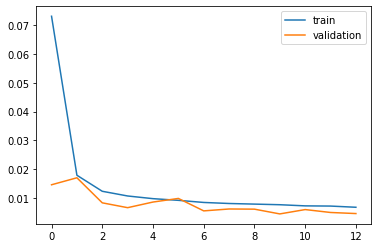

In [37]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [38]:
y_pred = model.predict(X_test)

273/273 [==============================] - 5s 17ms/step


In [39]:
y_train_inv = load_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = load_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = load_transformer.inverse_transform(y_pred)

In [40]:
print('R2 Score for LSTM Model =',r2_score(y_test, y_pred))

R2 Score for LSTM Model = 0.9836683161596738


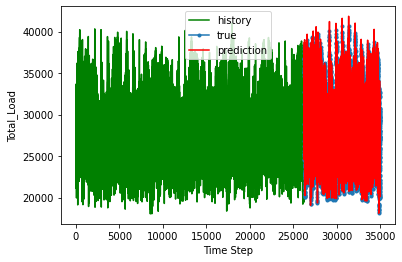

In [41]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total_Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();
plt.rcParams['figure.figsize'] = [30, 10]

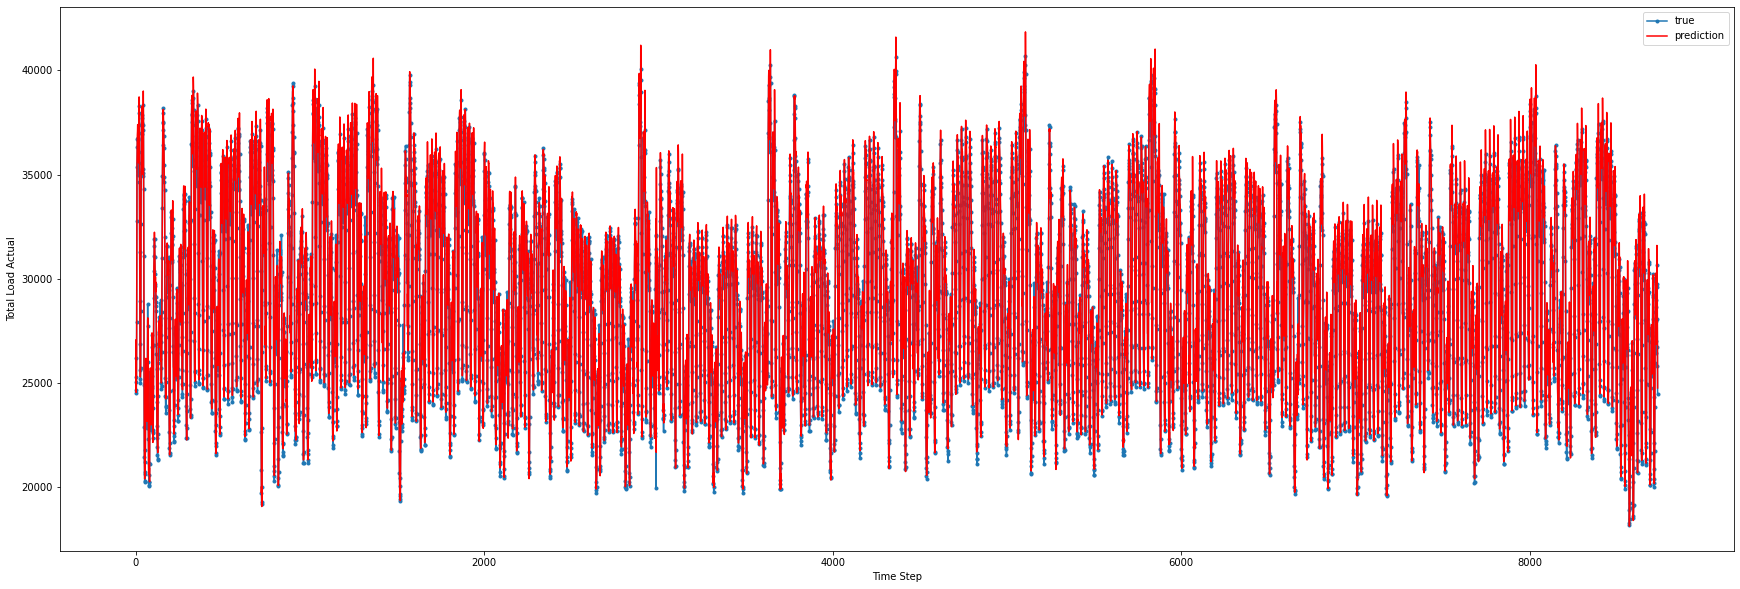

In [42]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Time Step')
plt.legend()
plt.show();

Below we can try whatever parameters we want with our model

In [43]:
def lstm_model_2():
    model = keras.Sequential()
    model.add(
      keras.layers.Bidirectional(
        keras.layers.LSTM(
          units = 128,
          input_shape=(X_train.shape[1], X_train.shape[2])
        )
      )
    )
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [50]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model2 = lstm_model_2()
history = model2.fit(
    X_train, y_train, 
    epochs=90, 
    batch_size=30, 
    validation_split=0.1,
    shuffle=False,
    verbose = 1,
    callbacks = [stop_early]
)

Epoch 1/90
395/395 [==============================] - 21s 46ms/step - loss: 0.1642 - val_loss: 0.0678
Epoch 2/90
395/395 [==============================] - 18s 46ms/step - loss: 0.0393 - val_loss: 0.0227
Epoch 3/90
395/395 [==============================] - 19s 47ms/step - loss: 0.0258 - val_loss: 0.0388
Epoch 4/90
395/395 [==============================] - 18s 47ms/step - loss: 0.0196 - val_loss: 0.0269
Epoch 5/90
395/395 [==============================] - 18s 46ms/step - loss: 0.0155 - val_loss: 0.0221
Epoch 6/90
395/395 [==============================] - 18s 46ms/step - loss: 0.0157 - val_loss: 0.0252
Epoch 7/90
395/395 [==============================] - 18s 46ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 8/90
395/395 [==============================] - 18s 45ms/step - loss: 0.0121 - val_loss: 0.0081
Epoch 9/90
395/395 [==============================] - 18s 45ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 10/90
395/395 [==============================] - 18s 46ms/step - loss: 0.010

395/395 [==============================] - 20s 50ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 81/90
395/395 [==============================] - 19s 49ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 82/90
395/395 [==============================] - 20s 50ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 83/90
395/395 [==============================] - 20s 50ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 84/90
395/395 [==============================] - 19s 49ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 85/90
395/395 [==============================] - 19s 49ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 86/90
395/395 [==============================] - 19s 49ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 87/90
395/395 [==============================] - 19s 49ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 88/90
395/395 [==============================] - 19s 49ms/step - loss: 0.0042 - val_loss: 0.0050


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

parameters = {'epochs': [5, 10, 25, 50, 100, 200],
              'batch_size': [10,20,30]
              }
scorers = {
        'precision_score': make_scorer(precision_score),
        'r2_score': make_scorer(r2_score),
        'recall_score': make_scorer(recall_score),
        'accuracy_score': make_scorer(accuracy_score)
        }
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
#reg_est = KerasRegressor(model=lstm_model, epochs=10, batch_size=5, verbose=0)
model = KerasRegressor(model=lstm_model,epochs=10, batch_size=10, verbose=1)
sh1 = GridSearchCV(estimator=model, param_grid=parameters,scoring=scorers, cv=3,n_jobs=-1, refit="precision_score")
sh = sh1.fit(X_train, y_train)
best_estimator = sh.best_estimator_
print("best param.", sh.best_params_)

model_fitted = best_estimator.fit(X_train, y_train)
pred_train = model_fitted.predict(X_train)
pred = model_fitted.predict(X_test)

mse_tr = mean_squared_error(y_train, pred_train)
mse_tst = mean_squared_error(y_test, pred)

msg = "%s: %f %f" % (name, mse_tr, mse_tst)
print(msg)

In [ ]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 30]
param_grid = dict(batch_size=batch_size, epochs=epochs)
#Create Model
model = KerasRegressor(model=lstm_model,nb_epoch=100, batch_size=5, verbose=0)
#Define Grid Search Structure
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

#Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from keras.callbacks import EarlyStopping, CSVLogger
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=5)
csv_logger = CSVLogger('training.log')
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 30]

for batch_no in batch_size:
    for ep in epochs:
        model = lstm_model2()
        print('Epoch: ',ep,'and Batch_Size:',batch_no)
        history=model.fit(X_train,y_train,epochs=ep,batch_size=batch_no,validation_data=(X_test,y_test) ,verbose=2,callbacks=[csv_logger,earlyStop])



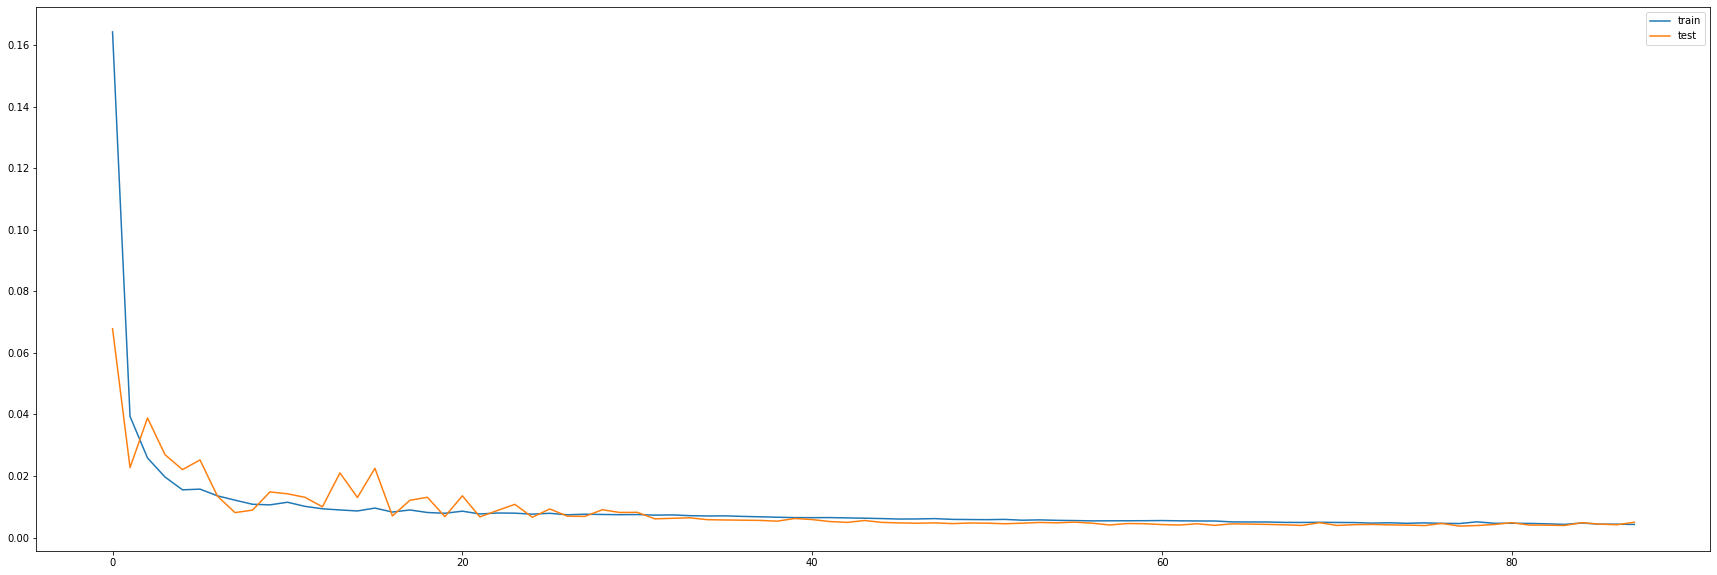

In [51]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [52]:
y_pred = model2.predict(X_test)

273/273 [==============================] - 2s 7ms/step


In [53]:
y_train_inv = load_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = load_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = load_transformer.inverse_transform(y_pred)

In [71]:
y_test_inv.reshape(-1,).shape

(8735,)

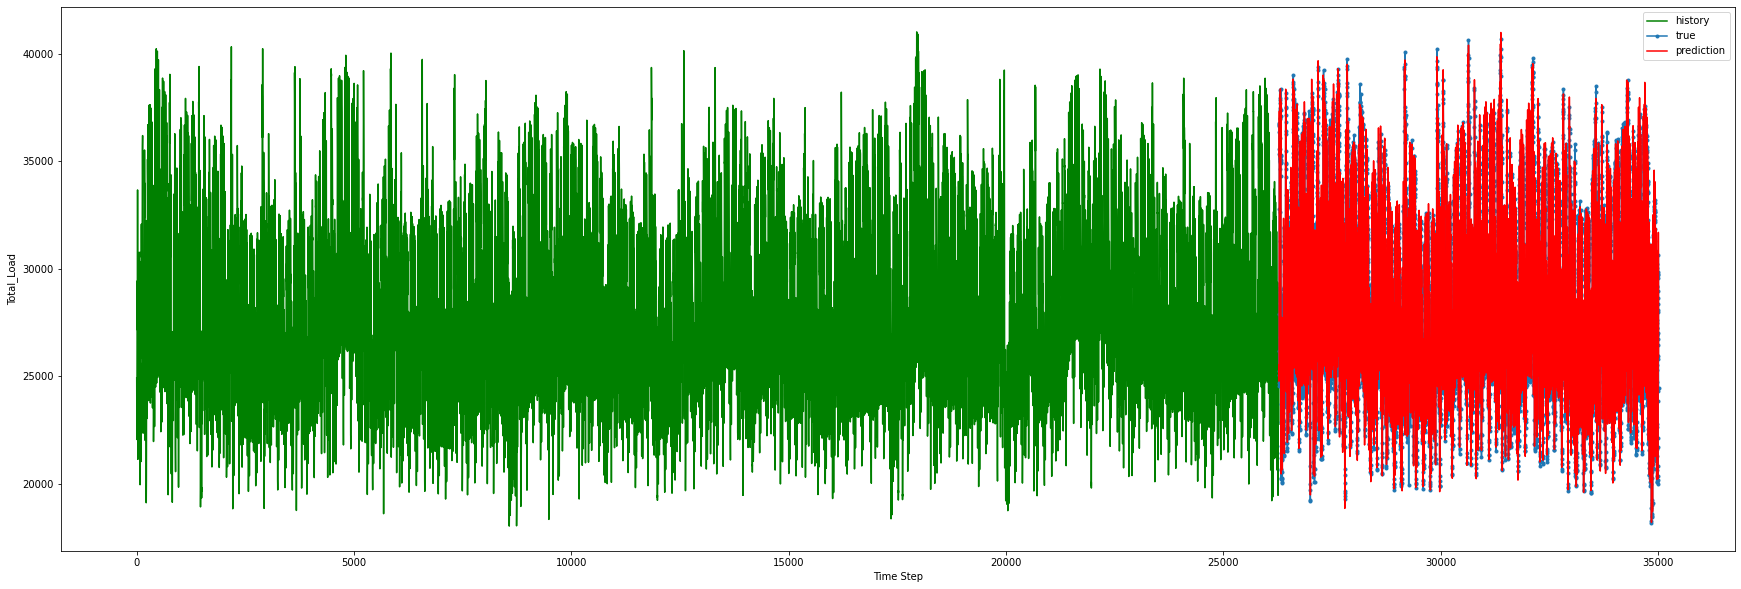

In [54]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total_Load')
plt.xlabel('Time Step')
plt.legend()
plt.show();
plt.rcParams['figure.figsize'] = [30, 10]

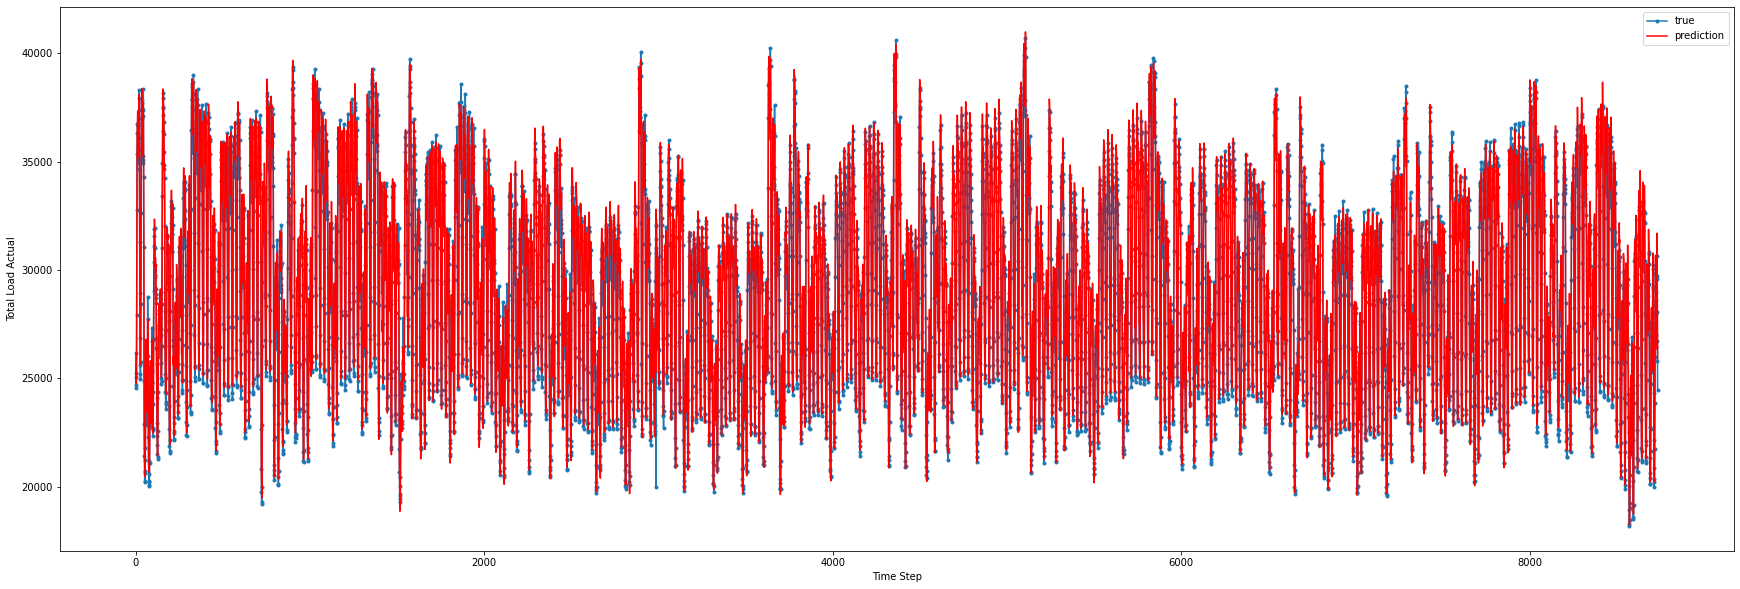

In [55]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Total Load Actual')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [73]:
print('R2 Score for LSTM Model =',r2_score(y_test_inv.reshape(-1,), y_pred_inv.reshape(-1,)))
print('MAPE Score for LSTM Model=', mean_absolute_percentage_error(y_test_inv.reshape(-1,), y_pred_inv.reshape(-1,)))
print('MAE Score for LSTM Model=', mean_absolute_error(y_test_inv.reshape(-1,), y_pred_inv.reshape(-1,)))

R2 Score for LSTM Model = 0.9778696690967343
MAPE Score for LSTM Model= 0.01805777221573447
MAE Score for LSTM Model= 512.1850008496708


In [57]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [61]:
MAPE(y_test_inv,y_pred_inv)

18.924251493166807

In [60]:
y_test, y_pred

(array([-0.36043175, -0.51304823, -0.56647083, ..., -0.10206312,
        -0.41221478, -0.59611969]),
 array([[-0.4476847 ],
        [-0.52017   ],
        [-0.5352651 ],
        ...,
        [ 0.09008615],
        [-0.2817745 ],
        [-0.3986908 ]], dtype=float32))

In [2]:
wdf = pd.read_csv('weather_features.csv')
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [7]:
wdf.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000
